In [78]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#IMPORTING DATASET
df=pd.read_csv("insurance.csv")

30.66339686098655
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
30.66339686098655
        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13
           count       mean       std     min       25%    50%       75%  \
region                                                                     
northeast  324.0  29.173503  5.937513  15.960  24.86625  28.88  32.89375   
northwest  325.0  29.199785  5.136765  17.385  25.74500  28.88  32.77500   
southeast  364.0  33.355989  6.477648  19.800  28.57250  33.33  37.81250   
southwest  325.0  30.596615  5.691836  17.400  26.90000  30.30  34.60000   

     

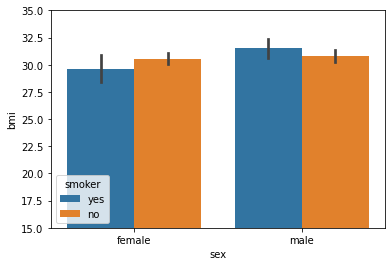

In [80]:
#ANALYSING BMI INDEX
print(df["bmi"].mean())
print(df["bmi"].describe().T)

pic=sns.barplot(x="sex",y="bmi",hue="smoker",data=df)
pic.set_ylim(15,35)
print(df["bmi"].mean())

print(df.groupby("sex")["bmi"].describe())
print(df.groupby("region")["bmi"].describe())

#BÖLGELERE VE CİNSİYETE GÖRE KARŞILAŞTIRMA
print(df.pivot_table("bmi",index="sex",columns="region"))

#YAŞINA GÖRE ORTALAMAA VE SİGARA İÇME DURUMUNA GÖRE
age=pd.cut(df["age"],[0,18,35,45,60,90])
print(df.pivot_table("bmi",["sex",age],"smoker"))

print(df.groupby("bmi").sum())
print(df.groupby("bmi").describe())

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64
                       bmi
sex    age                
female (0, 18]   32.930909
       (18, 35]  29.351918
       (35, 45]  30.218817
       (45, 60]  30.960388
       (60, 90]  31.821809
male   (0, 18]   29.855139
       (18, 35]  30.501327
       (35, 45]  30.255489
       (45, 60]  31.684064
       (60, 90]  33.104091


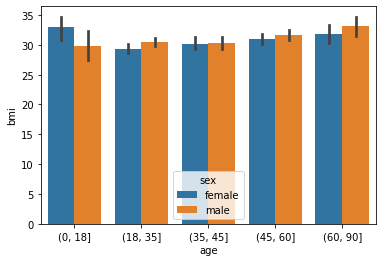

In [ ]:
print(df.groupby("sex")["bmi"].mean())
age=pd.cut(df["age"],[0,18,35,45,60,90])
print(df.pivot_table("bmi",["sex",age]))
sns.barplot(x=age,y="bmi",hue="sex",data=df)


region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64


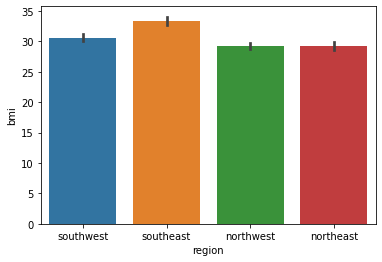

In [ ]:

print(df.groupby("region")["bmi"].mean())
sns.barplot(x="region",y="bmi",data=df)


         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  
        count          mean           sum
smoker                                   
no       1064   8434.268298  8.974061e+06
yes       274  32050.231832  8.781764e+06
               min          max
smoker                         
no       1121.8739  36910.60803
yes     12829.4551  63770.42801


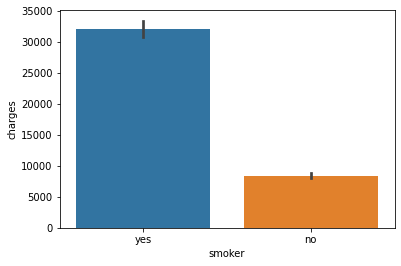

In [ ]:
#ANALYSING SMOKER-SCHARGES

print(df.groupby("smoker")["charges"].describe())
sns.barplot(x="smoker",y="charges",data=df)
    
print(df.groupby("smoker")["charges"].aggregate(["count","mean","sum"]))
print(df.groupby("smoker")["charges"].aggregate(["min","max"]))

(250.0, 370.0)

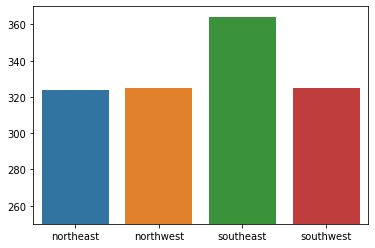

In [ ]:
#ANALYSING SMOKER REGION
temp=np.array(df.groupby("region")["smoker"].count())
regions=np.unique(df["region"])
pic2=sns.barplot(x=regions,y=temp,data=df)
pic2.set_ylim(250,370)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


(15.0, 35.0)

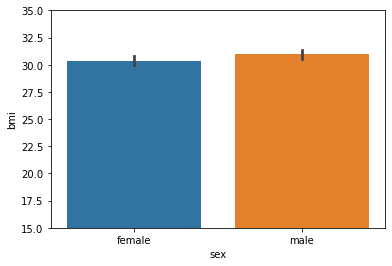

In [ ]:
#ANALYSING BMI-SEX

print(df.groupby("sex")["bmi"].describe())
pic3=sns.barplot(x="sex",y="bmi",data=df)
pic3.set_ylim(15,35)

In [100]:
#MOST CHILDREN
most=df.groupby("region")["children"].sum()
print(most)
print(most.argmax()) 
mostval=most[most.argmax()]
dict_most=most.to_dict()
value = {i for i in dict_most if dict_most[i]==mostval}
print(value)

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64
2
{'southeast'}


In [ ]:
#ANALYSING AGE-BMI

age=pd.cut(df["age"],[0,18,35,45,60,90])
print(df.pivot_table("bmi",age))

                bmi
age                
(0, 18]   31.326159
(18, 35]  29.943693
(35, 45]  30.237292
(45, 60]  31.319572
(60, 90]  32.441813


          count       mean       std     min    max
children                                           
0           574  30.550296  6.039106  15.960  53.13
1           324  30.623148  6.101435  16.815  52.58
2           240  30.978104  6.509644  16.815  48.07
3           157  30.684331  5.787173  18.905  46.53
4            25  31.391200  4.627211  24.415  41.47
5            18  29.605000  7.139686  18.300  46.75


(15.0, 35.0)

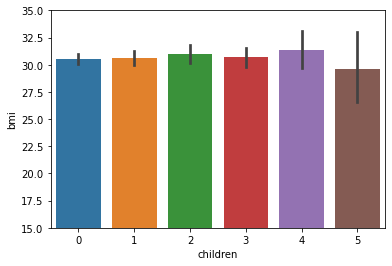

In [ ]:
#ANAYLSING BMI-CHILDREN


print(df.groupby("children")["bmi"].aggregate(["count","mean","std","min","max"]))
pic4=sns.barplot(x="children",y="bmi",data=df)
pic4.set_ylim(15,35)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


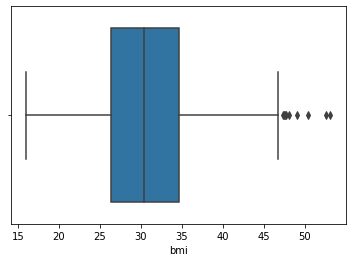

In [ ]:
#OUTLIER
sns.boxplot(df["bmi"])
#Evet veri setinde outlier değerler bulunmakta. Bunu da kutu grafiğinde sağda kalan kısımda görebiliriz.

In [ ]:
#ANALYSING BMI-CHARGES
bmi=pd.cut(df["bmi"],[15,25,35,45,55])
print(df.pivot_table("charges",bmi))

print(df.groupby(bmi)["charges"].aggregate(["count","mean","std","min","max"]))


               charges
bmi                   
(15, 25]  10284.290025
(25, 35]  12720.254311
(35, 45]  16913.681515
(45, 55]  17547.926750
          count          mean           std        min          max
bmi                                                                
(15, 25]    247  10284.290025   7494.493965  1121.8739  35069.37452
(25, 35]    775  12720.254311  11309.324842  1131.5066  62592.87309
(35, 45]    296  16913.681515  15367.757351  1141.4451  58571.07448
(45, 55]     20  17547.926750  19001.821439  1163.4627  63770.42801


In [ ]:
#ANALYSING REGION_SMOKER_BMI

print(df.pivot_table("bmi",index="region",columns="smoker"))

smoker            no        yes
region                         
northeast  29.332082  28.565224
northwest  29.212678  29.140431
southeast  33.442418  33.096703
southwest  30.507865  31.005172


In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

#### PART 4
#IMPORTING LIBRARIES
from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getiriniz.
x = df.iloc[:,0:-1].values
y = df.iloc[:,6].values    

In [ ]:
#Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
# LABEL ENCODER
from sklearn import preprocessing
#GETTING CATEGORICAL DATA
sex=df.iloc[:,1:2].values
smoker=df.iloc[:,4:5].values
region=df.iloc[:,5:6].values
le=preprocessing.LabelEncoder()

df.iloc[:,1:2]=le.fit_transform(df.iloc[:,1])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,5]=le.fit_transform(df.iloc[:,5])

#ONE HOT ENCODER
#ohe=preprocessing.OneHotEncoder()
#sex_ohe=ohe.fit_transform(sex).toarray()
#smoker_ohe=ohe.fit_transform(smoker).toarray()
#region_ohe=ohe.fit_transform(region).toarray()
print(df)
print(df.dtypes)


      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [ ]:
#Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
x = df.iloc[:,0:-1].values
y = df.iloc[:,6].values  
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)


In [ ]:
#Veri setini normalize ederek ölçekleyiniz.
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
# 5 CHOOSING REGRESSION MODEL

def model_score(df,alg):
    scores=dict()
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
    model=alg()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_test,y_pred)
    model_ismi = alg.__name__
    accuracy  = max(cross_val_score(model, x_train, y_train, scoring='r2', cv=5))
    scores[model]=accuracy
    print(model.score(x_test,y_pred))
    print("Model==",model_ismi,"\t Accuracy:",accuracy)
    print("\n\n --------------------------------------------\n")
    max_val=max(scores, key=scores.get)
    return max_val,scores[max_val]

value = {"Model İsmi" : [], "Doğruluk Oranı" : [], "RMSE" : []}

models = [LinearRegression,SVR,LGBMRegressor,
          XGBRegressor,RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,GradientBoostingRegressor]
#SEARCHING BEST MODEL
for i in models:
    global best_model
    best_model,model_Val=model_score(df,i)
    print(f"Best model for this data is {best_model}:{model_Val}")

1.0
Model== LinearRegression 	 Accuracy: 0.7449193130128458


 --------------------------------------------

Best model for this data is LinearRegression():0.7449193130128458
1.0
Model== SVR 	 Accuracy: -0.018017937466157097


 --------------------------------------------

Best model for this data is SVR():-0.018017937466157097
1.0
Model== LGBMRegressor 	 Accuracy: 0.8395853056111129


 --------------------------------------------

Best model for this data is LGBMRegressor():0.8395853056111129
[22:07:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squared

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

1.0
Model== MLPRegressor 	 Accuracy: -0.20874616940586432


 --------------------------------------------

Best model for this data is MLPRegressor():-0.20874616940586432
1.0
Model== KNeighborsRegressor 	 Accuracy: 0.09215703409773268


 --------------------------------------------

Best model for this data is KNeighborsRegressor():0.09215703409773268
1.0
Model== GradientBoostingRegressor 	 Accuracy: 0.8598016353052754


 --------------------------------------------

Best model for this data is GradientBoostingRegressor():0.8598016353052754


In [ ]:
# 6 HYPER PARAMETER
    
def Hyper_Parameter(model):
    parameters = {
    'loss': ['ls', 'lad','huber','quantile'],
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [3,5,6]
    } 
    from sklearn.model_selection import GridSearchCV 
    regressor = GridSearchCV(model, parameters, verbose=1,cv=5,n_jobs=-1) 
    regressor.fit(x_train,y_train) 
    print(f"Best parameters-->{regressor.best_params_}")
    results=regressor.cv_results_ 
    mean_score = results['mean_test_score']
    std_score = results['std_test_score']
    params = results['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
Hyper_Parameter(best_model)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters-->{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3}
0.824 + or -0.03 for the {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3}
0.784 + or -0.047 for the {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5}
0.775 + or -0.054 for the {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 6}
0.751 + or -0.05 for the {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3}
0.804 + or -0.035 for the {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5}
0.807 + or -0.039 for the {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6}
0.835 + or -0.027 for the {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3}
0.814 + or -0.027 for the {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 5}
0.791 + or -0.044 for the {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6}
0.529 + or -0.129 for the {'learning_rate': 0.1, 'loss': 'quantile', 'max_depth': 3}
0.566 + or -0.092 for the {'learning_rate': 0.1, 'loss': '

In [ ]:
#7. MODEL EVALUATION
def Performance(m):
    from sklearn.model_selection import  train_test_split
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
    model=m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error
    mse = mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    pe=mean_poisson_deviance(y_test,y_pred)
    mgd=mean_gamma_deviance(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print(f"Mean-Squared Error:{mse}")
    print(f"Mean-Squared Error:{mae}")
    print(f"Poisson Deviance:{pe}")
    print(f"Gamma Deviance:{mgd}")
    print(f"Absolute Percentage Error:{mape}")
#PERFOMANCE
Performance(best_model)


Mean-Squared Error:18459365.61052713
Mean-Squared Error:2547.138398271457
Poisson Deviance:1768.3013805718529
Gamma Deviance:0.2430337305970908
Absolute Percentage Error:0.30889239066998175


In [ ]:
#FULL CODE 
def model_score(df,alg):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
    model=alg()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_test,y_pred)
    model_ismi = alg.__name__
    accuracy =r2_score(y_test,y_pred)
    scores[model]=accuracy
    print(model.score(x_test,y_pred))
    print("Model==",model_ismi,"\t Accuracy:",accuracy)
    print("\n\n --------------------------------------------\n")
    max_val=max(scores, key=scores.get)
    return max_val,scores[max_val]
    
def Hyper_Parameter(model):
    parameters = {
    'loss': ['ls', 'lad','huber','quantile'],
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [3,5,6]
    } 
    from sklearn.model_selection import GridSearchCV 
    regressor = GridSearchCV(model, parameters, verbose=1,cv=5,n_jobs=-1) 
    regressor.fit(x_train,y_train) 
    print(f"Best parameters-->{regressor.best_params_}")
    results=regressor.cv_results_ 
    mean_score = results['mean_test_score']
    std_score = results['std_test_score']
    params = results['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
        
def Performance(m):
    from sklearn.model_selection import  train_test_split
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
    model=m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error
    mse = mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    pe=mean_poisson_deviance(y_test,y_pred)
    mgd=mean_gamma_deviance(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print(f"Mean-Squared Error:{mse}")
    print(f"Mean-Squared Error:{mae}")
    print(f"Poisson Deviance:{pe}")
    print(f"Gamma Deviance:{mgd}")
    print(f"Absolute Percentage Error:{mape}")
        

def main():
    from sklearn import preprocessing

    #GETTING CATEGORICAL DATA
    sex=df.iloc[:,1:2].values
    smoker=df.iloc[:,4:5].values
    region=df.iloc[:,5:6].values
    
    
    # LABEL ENCODER
    le=preprocessing.LabelEncoder()
    
    df.iloc[:,1:2]=le.fit_transform(df.iloc[:,1])
    df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
    df.iloc[:,5]=le.fit_transform(df.iloc[:,5])
    
    
    #ONE HOT ENCODER
    ohe=preprocessing.OneHotEncoder()
    sex_ohe=ohe.fit_transform(sex).toarray()
    smoker_ohe=ohe.fit_transform(smoker).toarray()
    region_ohe=ohe.fit_transform(region).toarray()
    
    ###MODEL EĞİTME
    global x,y,x_train,x_test,y_train,y_test
    x = df.iloc[:,0:-1].values
    y = df.iloc[:,6].values
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
    
    
    #DOĞRUSAL REGRESYON

    #Normalizasyon
    sc=StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_test = sc.transform(x_test)
    
    

    
    value = {"Model İsmi" : [], "Doğruluk Oranı" : [], "RMSE" : []}

    models = [LinearRegression,SVR,LGBMRegressor,
              XGBRegressor,RandomForestRegressor,
              DecisionTreeRegressor,
              MLPRegressor,
              KNeighborsRegressor,GradientBoostingRegressor]

    #SEARCHING BEST MODEL
    for i in models:
       global best_model
       best_model,model_Val=model_score(df,i)
       print(f"Best model for this data is {best_model}:{model_Val}")
    
    #LOOKING HYPER PARAMETERS
    Hyper_Parameter(best_model)
            
    #PERFOMANCE
    Performance(best_model)


if __name__ == "__main__":
    main()